# Constraint Satisfaction Problem : Graph coloring


## Create Data

We can create a planar graph with $n$ vertices by randomly placing $n$ points in 2-dimensional Euclidean space and then performing a [Delaunay triangulation](https://en.wikipedia.org/wiki/Delaunay_triangulation).

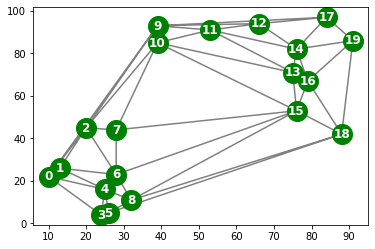

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay

# create points and sort them by 
n = 20
points = np.random.randint(100, size=(n, 2))
o = np.argsort(points[:,0])
points = points[o,:]


# triangualte
tri = Delaunay(points)


# plot
plt.triplot(points[:,0], points[:,1], tri.simplices, color = "gray")
plt.plot(points[:,0], points[:,1], 'o', color = "green", markersize = 20)

for i in range(len(points)):
       plt.annotate(i, points[i,:], 
        color='white', fontsize="large", weight='heavy',
        horizontalalignment='center', verticalalignment='center')

plt.show()

The triangulation can be converted into a list with an array of neighbor vertex indices for each point (see man page for [scipy.spatial.Delaunay](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.Delaunay.html)). 

In [67]:
(indptr, indices) = tri.vertex_neighbor_vertices

neighbors = []

for k in range(len(intptr)-1):
    neighbors.append(np.sort(indices[indptr[k]:indptr[k+1]]))
    
neighbors

[array([1, 2, 3, 4, 5], dtype=int32),
 array([0, 2, 6], dtype=int32),
 array([0, 1, 4, 6, 7], dtype=int32),
 array([ 0,  5,  8, 14], dtype=int32),
 array([0, 2, 5, 7, 9], dtype=int32),
 array([ 0,  3,  4,  8,  9, 12], dtype=int32),
 array([ 1,  2,  7, 10, 19], dtype=int32),
 array([ 2,  4,  6,  9, 10], dtype=int32),
 array([ 3,  5, 12, 13, 14], dtype=int32),
 array([ 4,  5,  7, 10, 11, 12], dtype=int32),
 array([ 6,  7,  9, 11, 19], dtype=int32),
 array([ 9, 10, 12, 15, 19], dtype=int32),
 array([ 5,  8,  9, 11, 13, 15, 16, 17], dtype=int32),
 array([ 8, 12, 14, 17], dtype=int32),
 array([ 3,  8, 13, 17], dtype=int32),
 array([11, 12, 16, 18, 19], dtype=int32),
 array([12, 15, 17, 18], dtype=int32),
 array([12, 13, 14, 16, 18, 19], dtype=int32),
 array([15, 16, 17, 19], dtype=int32),
 array([ 6, 10, 11, 15, 17, 18], dtype=int32)]

The first row are the indices for the points neighboring point 0.


## Assignment

Implement the following graph coloring algorithms:

* Backtracking search without forward checking
* Backtracking search with forward checking
* Hill climbing search with the min-conflicts heuristic

Try to color graphs of several sizes with 3 and 4 colors. For each $n$, generate several random instances, and try to make n as large as you can manage. On average, how many constraints (edges) do your map coloring instances have for each $n$? Report the performance of each search algorithm as a function of $n$. For both variants of backtracking search, you can characterize performance in terms of the number of variable assignments attempted. For hill climbing search, report the number of uphill moves and random restarts required in order to reach a solution. Of course, you can also report raw running times as a function of $n$.

__Bonus:__ 
Implement simulated annealing.